In [149]:
"""
Implementation of PCA and ICA on Alzheimer's DNA Microarray Gene Expression Data, 
as outlined by Kong et al.
"""

import GEOparse
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
import scipy.stats as stats
import pandas as pd
from sklearn.preprocessing import StandardScaler 

In [150]:
#Import data
gse = GEOparse.get_GEO(filepath = 'GDS810_full.soft.gz')
table = gse.table

#Select only control and severe AD samples
#Excluding C-2, AD-2, and AD-7
subjects = ['GSM21215','GSM21218','GSM21219','GSM21220','GSM21221','GSM21226','GSM21231','GSM21232',
            'GSM21203','GSM21207','GSM21208','GSM21212','GSM21213']
data = table.loc[:, subjects]
data = data.T

subjectLabels = ['C-1', 'C-3', 'C-4', 'C-5', 'C-6', 'C-7', 'C-8', 'C-9', 
              'AD-1', 'AD-3', 'AD-4', 'AD-5', 'AD-6']

16-Mar-2022 22:28:16 INFO GEOparse - Parsing GDS810_full.soft.gz: 
16-Mar-2022 22:28:16 DEBUG GEOparse - DATABASE: Geo
16-Mar-2022 22:28:16 DEBUG GEOparse - DATASET: GDS810
16-Mar-2022 22:28:16 DEBUG GEOparse - SUBSET: GDS810_1
16-Mar-2022 22:28:16 DEBUG GEOparse - SUBSET: GDS810_2
16-Mar-2022 22:28:16 DEBUG GEOparse - SUBSET: GDS810_3
16-Mar-2022 22:28:16 DEBUG GEOparse - SUBSET: GDS810_4
16-Mar-2022 22:28:16 DEBUG GEOparse - ANNOTATION: 
16-Mar-2022 22:28:16 ERROR GEOparse - Cannot recognize type Annotation
16-Mar-2022 22:28:16 DEBUG GEOparse - DATASET: GDS810
<ipython-input-150-7d678b889a16>:2: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  gse = GEOparse.get_GEO(filepath = 'GDS810_full.soft.gz')


Text(0, 0.5, 'Principal Component 2')

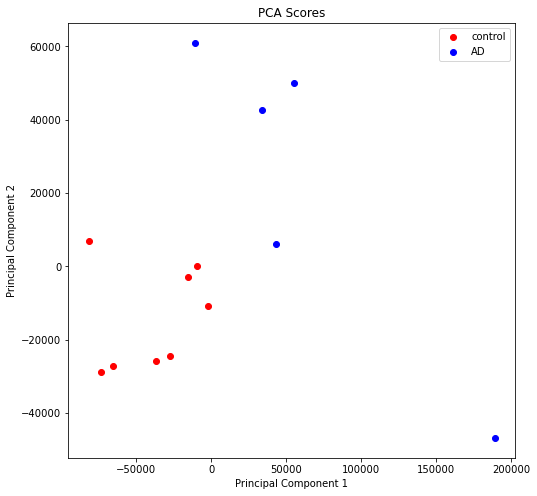

In [151]:
"""
Plot PCA scores
"""

pca = PCA(n_components=10)
scores = pca.fit_transform(data)
loadings = pd.DataFrame(pca.components_.T)
loadings = loadings*np.sqrt(pca.explained_variance_)

pc1 = scores[:,0]
pc2 = scores[:,1]

plt.scatter(scores[0:8,0], scores[0:8,1], c='r', label='control')
plt.scatter(scores[8:,0], scores[8:,1], c='b', label='AD')
plt.legend()
plt.title('PCA Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

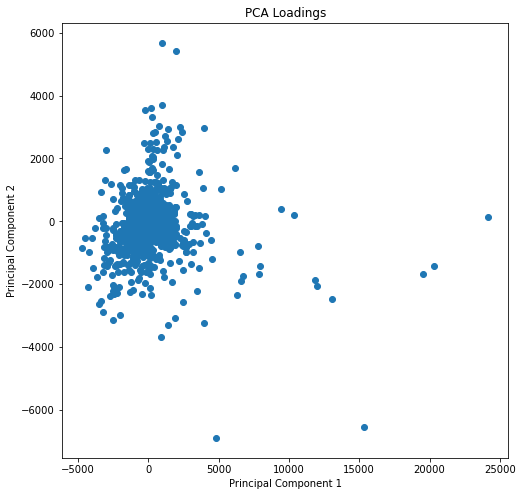

In [152]:
"""
Plot PCA loadings
"""

plt.scatter(loadings[0], loadings[1])
plt.title('PCA Loadings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [153]:
"""
Select only 3617 genes
"""

features = np.arange(0,len(loadings.iloc[:,1]))
loadingsPC1 = loadings.iloc[:,1]
pcArray = np.array((loadingsPC1,features))

#Create an array sorted by the lowest to highest pc values
sortPC = pcArray[:,pcArray[0].argsort()]
#Create an array with only the indexes of the pc's resorted
selectGenes = sortPC[1,18666:]

#Create an array with both the pc values and the indexes (resorted by pc value and including only the 3617 largest pcs)
selectGenesIdx = sortPC[:,18666:]
#Switch order of columns to be features,components
selectGenesIdx = np.array((selectGenesIdx[1,:], selectGenesIdx[0,:]))
#Resort now by index for the 3617 components and indexes by index to return the components to their original order 
desortPC = selectGenesIdx[:, selectGenesIdx[0].argsort()]
#Make an array with only the components
selectGenes = desortPC[0,:]     

selectData = table.loc[selectGenes, subjects]
scaledData = StandardScaler().fit_transform(selectData)
dataNorm = stats.zscore(scaledData)
dataNorm = pd.DataFrame(dataNorm)


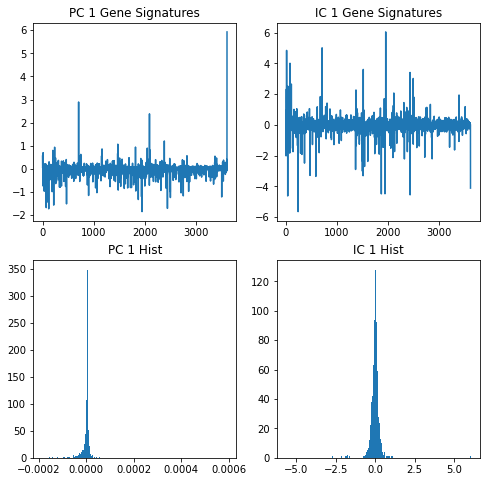

In [156]:
"""
Run PCA and ICA on select genes and view for significant genes
"""

pca = PCA(n_components=10)
principalcomponents = pca.fit_transform(dataNorm.T)
loadingsPCA = pd.DataFrame(pca.components_.T)
loadingsPCA = loadingsPCA*np.sqrt(pca.explained_variance_)

ica = FastICA(n_components=13,max_iter=50)
geneprofiles = ica.fit_transform(dataNorm.T)
loadingsICA = ica.mixing_
genes = np.arange(0,3617)

figure,axis = plt.subplots(2,2)

axis[0,0].plot(genes, loadingsPCA.iloc[:,0])
axis[0,0].set_title('PC 1 Gene Signatures')

axis[0,1].plot(genes, loadingsICA[:,0]*5e15)
axis[0,1].set_title('IC 1 Gene Signatures')

axis[1,1].hist(loadingsICA[:,0]*5e15,bins=1000)
axis[1,1].set_title('IC 1 Hist')

axis[1,0].hist(loadingsPCA.iloc[:,0]*10e-5,bins=1000)
axis[1,0].set_title('PC 1 Hist')

plt.rcParams["figure.figsize"] = (8,8)


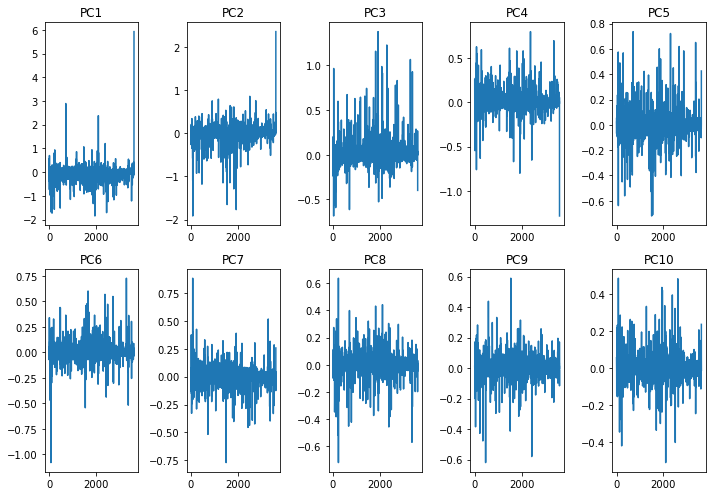

In [159]:
"""
Plot gene signatures of first 10 PCs 
"""

fig, ax = plt.subplots(2,5)

ax[0,0].plot(genes,loadingsPCA.iloc[:,0])
ax[0,0].set_title('PC1')

ax[0,1].plot(genes,loadingsPCA.iloc[:,1])
ax[0,1].set_title('PC2')

ax[0,2].plot(genes,loadingsPCA.iloc[:,2])
ax[0,2].set_title('PC3')

ax[0,3].plot(genes,loadingsPCA.iloc[:,3])
ax[0,3].set_title('PC4')

ax[0,4].plot(genes,loadingsPCA.iloc[:,4])
ax[0,4].set_title('PC5')

ax[1,0].plot(genes,loadingsPCA.iloc[:,5])
ax[1,0].set_title('PC6')

ax[1,1].plot(genes,loadingsPCA.iloc[:,6])
ax[1,1].set_title('PC7')

ax[1,2].plot(genes,loadingsPCA.iloc[:,7])
ax[1,2].set_title('PC8')

ax[1,3].plot(genes,loadingsPCA.iloc[:,8])
ax[1,3].set_title('PC9')

ax[1,4].plot(genes,loadingsPCA.iloc[:,9])
ax[1,4].set_title('PC10')

fig.tight_layout()
plt.rcParams["figure.figsize"] = (10,7)


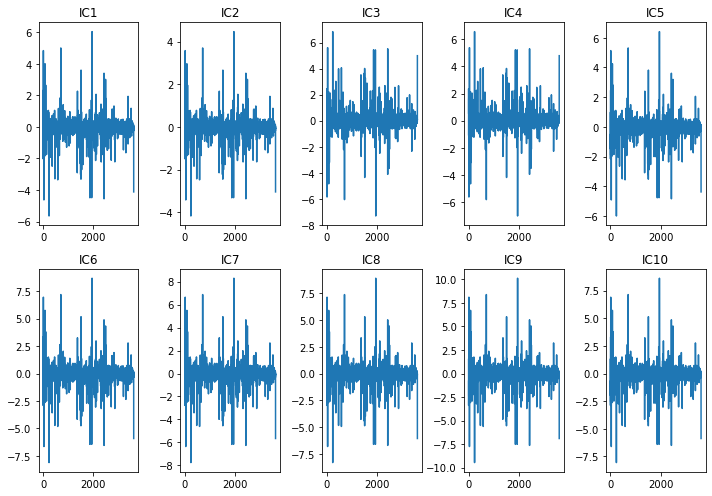

In [160]:
"""
Plot gene signatures of first 10 ICs 
"""

fig, ax = plt.subplots(2,5)

ax[0,0].plot(genes,loadingsICA[:,0]*5e15)
ax[0,0].set_title('IC1')

ax[0,1].plot(genes,loadingsICA[:,1]*5e15)
ax[0,1].set_title('IC2')

ax[0,2].plot(genes,loadingsICA[:,2]*5e15)
ax[0,2].set_title('IC3')

ax[0,3].plot(genes,loadingsICA[:,3]*5e15)
ax[0,3].set_title('IC4')

ax[0,4].plot(genes,loadingsICA[:,4]*5e15)
ax[0,4].set_title('IC5')

ax[1,0].plot(genes,loadingsICA[:,5]*5e15)
ax[1,0].set_title('IC6')

ax[1,1].plot(genes,loadingsICA[:,6]*5e15)
ax[1,1].set_title('IC7')

ax[1,2].plot(genes,loadingsICA[:,7]*5e15)
ax[1,2].set_title('IC8')

ax[1,3].plot(genes,loadingsICA[:,8]*5e15)
ax[1,3].set_title('IC9')

ax[1,4].plot(genes,loadingsICA[:,9]*5e15)
ax[1,4].set_title('IC10')

fig.tight_layout()
plt.rcParams["figure.figsize"] = (10,7)

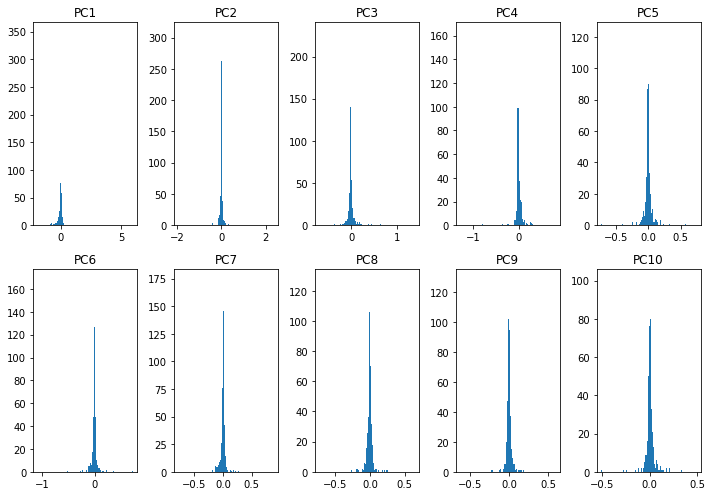

In [162]:
"""
Plot histograms of first 10 PCs 
"""

fig, ax = plt.subplots(2,5)

ax[0,0].hist(loadingsPCA.iloc[:,0], bins=1000)
ax[0,0].set_title('PC1')

ax[0,1].hist(loadingsPCA.iloc[:,1], bins=1000)
ax[0,1].set_title('PC2')

ax[0,2].hist(loadingsPCA.iloc[:,2], bins=1000)
ax[0,2].set_title('PC3')

ax[0,3].hist(loadingsPCA.iloc[:,3], bins=1000)
ax[0,3].set_title('PC4')

ax[0,4].hist(loadingsPCA.iloc[:,4], bins=1000)
ax[0,4].set_title('PC5')

ax[1,0].hist(loadingsPCA.iloc[:,5], bins=1000)
ax[1,0].set_title('PC6')

ax[1,1].hist(loadingsPCA.iloc[:,6], bins=1000)
ax[1,1].set_title('PC7')

ax[1,2].hist(loadingsPCA.iloc[:,7], bins=1000)
ax[1,2].set_title('PC8')

ax[1,3].hist(loadingsPCA.iloc[:,8], bins=1000)
ax[1,3].set_title('PC9')

ax[1,4].hist(loadingsPCA.iloc[:,9], bins=1000)
ax[1,4].set_title('PC10')

fig.tight_layout()
plt.rcParams["figure.figsize"] = (10,7)

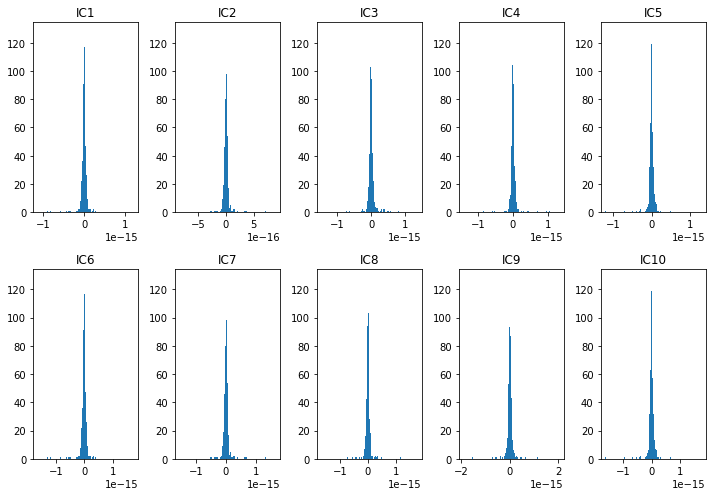

In [163]:
"""
Plot histograms of first 10 PCs 
"""

fig, ax = plt.subplots(2,5)

ax[0,0].hist(loadingsICA[:,0], bins=1000)
ax[0,0].set_title('IC1')

ax[0,1].hist(loadingsICA[:,1], bins=1000)
ax[0,1].set_title('IC2')

ax[0,2].hist(loadingsICA[:,2], bins=1000)
ax[0,2].set_title('IC3')

ax[0,3].hist(loadingsICA[:,3], bins=1000)
ax[0,3].set_title('IC4')

ax[0,4].hist(loadingsICA[:,4], bins=1000)
ax[0,4].set_title('IC5')

ax[1,0].hist(loadingsICA[:,5], bins=1000)
ax[1,0].set_title('IC6')

ax[1,1].hist(loadingsICA[:,6], bins=1000)
ax[1,1].set_title('IC7')

ax[1,2].hist(loadingsICA[:,7], bins=1000)
ax[1,2].set_title('IC8')

ax[1,3].hist(loadingsICA[:,8], bins=1000)
ax[1,3].set_title('IC9')

ax[1,4].hist(loadingsICA[:,9], bins=1000)
ax[1,4].set_title('IC10')

fig.tight_layout()
plt.rcParams["figure.figsize"] = (10,7)

Number of significant genes selected by IC4: 119
Number of significant genes selected by IC5: 110


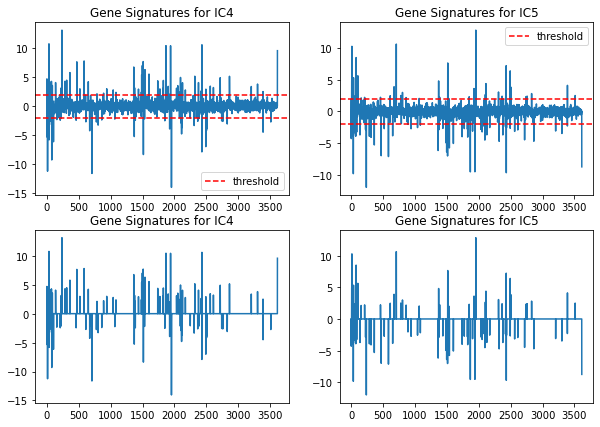

In [164]:
"""
View IC's 4 and 5
"""

figure,axis = plt.subplots(2,2)

axis[0,0].plot(genes,loadingsICA[:,3]*10e15)
axis[0,0].set_title('Gene Signatures for IC4')
axis[0,0].axhline(y=2,color='r',linestyle = '--')
axis[0,0].axhline(y=-2,color='r',linestyle = '--', label='threshold')
axis[0,0].legend()

axis[0,1].plot(genes,loadingsICA[:,4]*10e15)
axis[0,1].set_title('Gene Signatures for IC5')
axis[0,1].axhline(y=2,color='r',linestyle = '--', label='threshold')
axis[0,1].axhline(y=-2,color='r',linestyle = '--')
axis[0,1].legend()

loadingsZeroed4 = np.zeros(len(loadingsICA[:,3]))
loadingsZeroed5 = np.zeros(len(loadingsICA[:,4]))
count4 = 0
count5 = 0

for i in range(len(loadingsZeroed4)):
    if (abs(loadingsICA[i,3])*10e15 > 2):
        loadingsZeroed4[i] = loadingsICA[i,3]
        count4 += 1
        
for i in range(len(loadingsZeroed5)):
    if (abs(loadingsICA[i,4])*10e15 > 2):
        loadingsZeroed5[i] = loadingsICA[i,4]
        count5 += 1
        
axis[1,0].plot(genes,loadingsZeroed4*10e15)
axis[1,0].set_title('Gene Signatures for IC4')
#axis[1,0].axhline(y=2,color='r',linestyle = '--')
#axis[1,0].axhline(y=-2,color='r',linestyle = '--', label='threshold')

axis[1,1].plot(genes,loadingsZeroed5*10e15)
axis[1,1].set_title('Gene Signatures for IC5')
#axis[1,1].axhline(y=2,color='r',linestyle = '--', label='threshold')
#axis[1,1].axhline(y=-2,color='r',linestyle = '--')
    
print("Number of significant genes selected by IC4: " + str(count4))
print("Number of significant genes selected by IC5: " + str(count5))


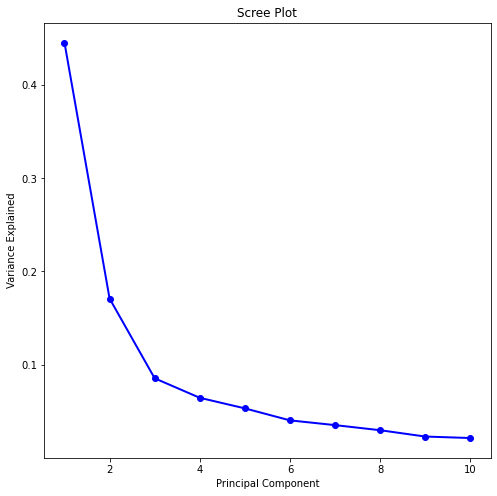

In [121]:
"""
Show scree plot 
"""

PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(668.9999999999999, 0.5, 'Principal components')

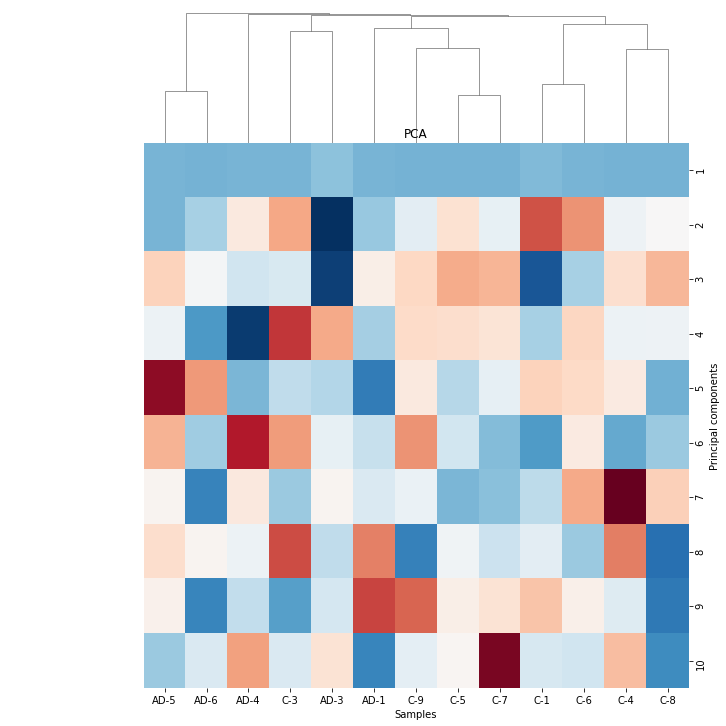

In [122]:
"""
View PCA Clustermap
"""

pca = PCA(n_components=10)
pca_transformer = pca.fit_transform(dataNorm)
PCs = pca.components_

sns.clustermap(PCs, metric="correlation", cmap="RdBu", cbar_pos=None, row_cluster=False, xticklabels=subjectLabels, yticklabels=np.arange(1,11))

plt.title("PCA")
plt.xlabel("Samples")
plt.ylabel("Principal components")

Text(668.9999999999999, 0.5, 'Latent variables')

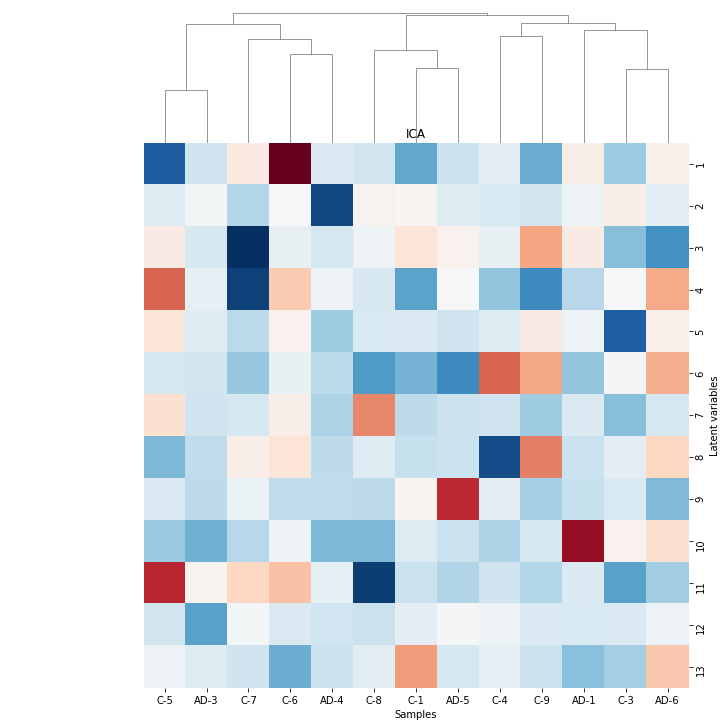

In [123]:
"""
View ICA Clustermap
"""

ica = FastICA(n_components=13)
ica_transformer = ica.fit_transform(dataNorm)
ICs = ica.components_

sns.clustermap(ICs, metric="correlation", cmap="RdBu", cbar_pos=None, row_cluster=False, xticklabels=subjectLabels, yticklabels=np.arange(1,14))

plt.title("ICA")
plt.xlabel("Samples")
plt.ylabel("Latent variables")